In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-data/dataset.csv


In [7]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)
from sklearn.model_selection import cross_val_score

df = pd.read_csv("/kaggle/input/spotify-data/dataset.csv")
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


# EDA

track_id - id

artists - исполнитель

album_name - название альбома

track_name - название трека

popularity - популярность

duration_ms - длительность трека

explicit - ненормативная лексика

danceability - насколько трек подходит для танцев

energy - энергичность

key - тональность трека(0 = до, 1 = до# | ре♭)

loudness - громкость в дц

mode - лад (мажор/минор)

speechiness - количество текста(насыщенность)

acousticness - акустичность

instrumentalness - инструментальность

liveness - живое исполнение

valence - настроение(грустное - радостное)

tempo - темп

time_signature - размер такта

track_genre - жанр


In [8]:
print(df.isnull().sum())
print("\nDATA Type")
print(df.dtypes)

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

DATA Type
Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo     

In [9]:
#удалим пустые
df = df.dropna()
print(df.isnull().sum())

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [10]:
#в данном датасете не несут пользы.
df = df.drop(['Unnamed: 0', 'track_id','artists','album_name','track_name'], axis=1)
print(df.isnull().sum())

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


При изучении файла "глазами" заметил, что в popularity очень много значений 0, решил это  проверить.

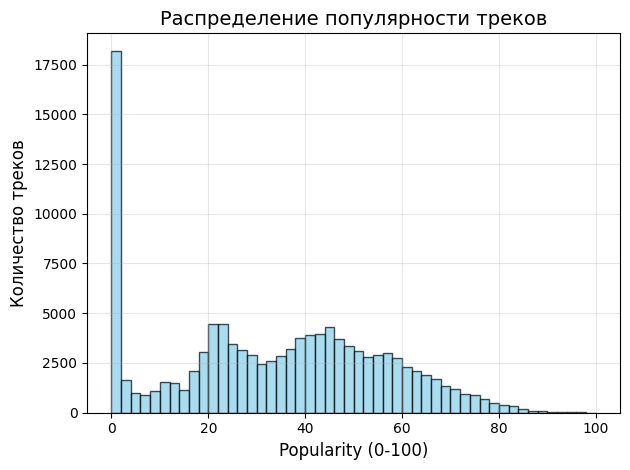

In [11]:
n, bins, patches = plt.hist(df['popularity'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Распределение популярности треков', fontsize=14)
plt.xlabel('Popularity (0-100)', fontsize=12)
plt.ylabel('Количество треков', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Действительно, огромное количество треков имеют значение популярности 0. Это создаст шум при анализе данных, принял решение их удалить

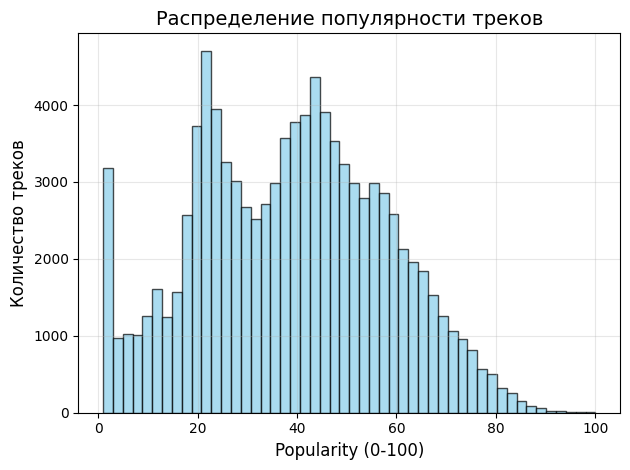

In [12]:
df_clean = df[df['popularity'] > 0].copy()
n, bins, patches = plt.hist(df_clean['popularity'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Распределение популярности треков', fontsize=14)
plt.xlabel('Popularity (0-100)', fontsize=12)
plt.ylabel('Количество треков', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Гипотеза 1
Популярность трека зависит от его "танцевальности", среднее значение танцевальности - самое популярное.

/tmp/ipykernel_55/722363557.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_clean.groupby('danceability_bin')['popularity'].mean()


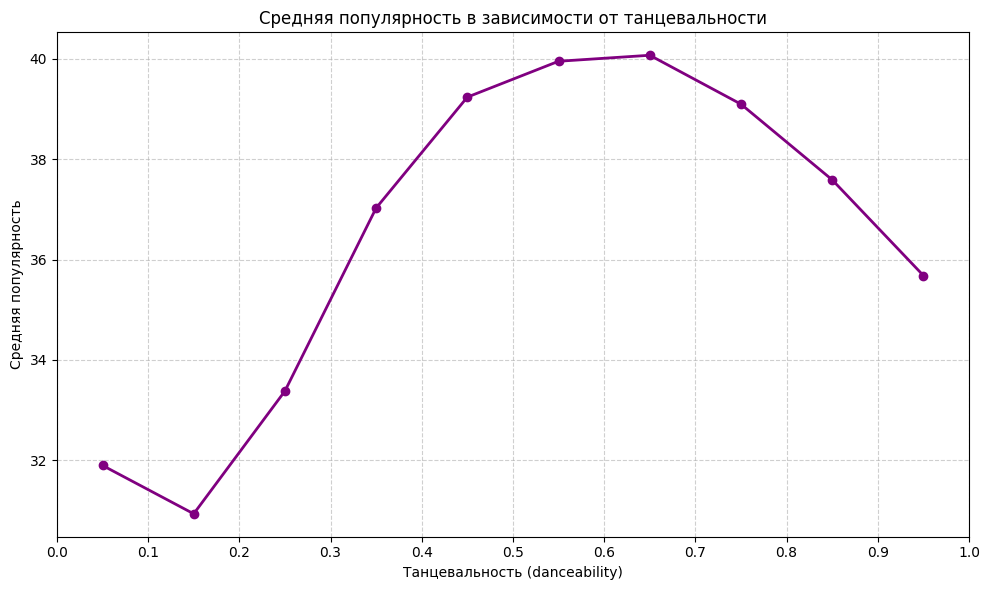

In [13]:

#интервалы танцевальности (с шагом 0.1)
bins = np.arange(0, 1.1, 0.1)
df_clean['danceability_bin'] = pd.cut(df_clean['danceability'], bins=bins, include_lowest=True)

# Группируем по интервалам и считаем среднюю популярность
grouped = df_clean.groupby('danceability_bin')['popularity'].mean()

# Извлекаем центры интервалов вручную
bin_centers = (bins[:-1] + bins[1:]) / 2 # даёт центры: [0.05, 0.15, ..., 0.95]

# Построение линейного графика
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, grouped.values, marker='o', linestyle='-', color='purple', linewidth=2, markersize=6)
plt.title('Средняя популярность в зависимости от танцевальности')
plt.xlabel('Танцевальность (danceability)')
plt.ylabel('Средняя популярность')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.tight_layout()
plt.show()

Вывод: гипотеза подтвердилась, средние значения танцевальности - самые популярные 

# Гипотеза 2

Популярность трека зависит от его энергичности( по аналогии с Гипотезой 1 - золотая середина - самая популярная)

/tmp/ipykernel_55/1850653104.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_clean.groupby('energy_bin')['popularity'].mean()


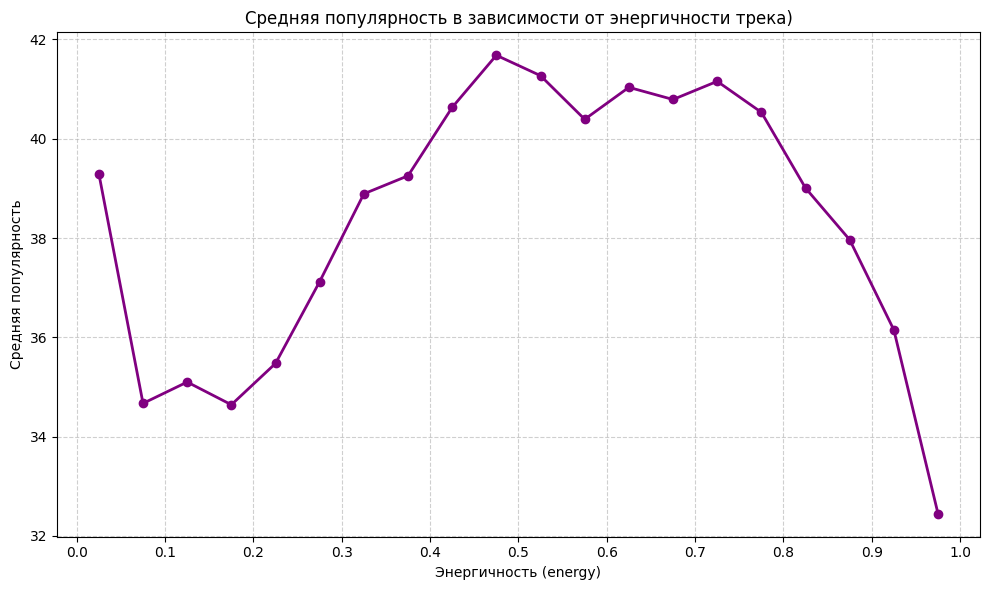

In [14]:

# Создадим больше бинов для гладкости (20 интервалов)
n_bins = 20
bins = np.linspace(0, 1, n_bins + 1)  # равномерные интервалы от 0 до 1
df_clean['energy_bin'] = pd.cut(df_clean['energy'], bins=bins, include_lowest=True)

# Группировка и усреднение популярности
grouped = df_clean.groupby('energy_bin')['popularity'].mean()

# Центры бинов для оси X
bin_centers = (bins[:-1] + bins[1:]) / 2

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, grouped.values, marker='o', color='purple', linewidth=2, markersize=6)
plt.title('Средняя популярность в зависимости от энергичности трека)')
plt.xlabel('Энергичность (energy)')
plt.ylabel('Средняя популярность')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.tight_layout()
plt.show()

Вывод: Гиптеза подтвердилась, теория "золотой середины" подтверждается

# Гипотеза 3

Треки в мажорном ладу (mode = 1) в среднем имеют более высокую популярность, чем треки в миноре (mode = 0).

Средняя популярность:
Минор (mode=0): 38.83
Мажор (mode=1): 38.58


/tmp/ipykernel_55/365754240.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean, x='mode', y='popularity', errorbar=('ci', 95), palette=['lightcoral', 'lightblue'])


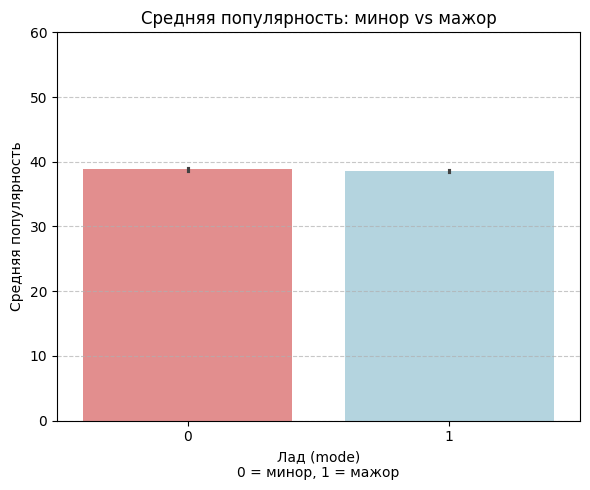

In [15]:

# Средняя популярность по группам
mean_pop = df_clean.groupby('mode')['popularity'].mean()
print("Средняя популярность:")
print(f"Минор (mode=0): {mean_pop[0]:.2f}")
print(f"Мажор (mode=1): {mean_pop[1]:.2f}")

plt.figure(figsize=(6, 5))
sns.barplot(data=df_clean, x='mode', y='popularity', errorbar=('ci', 95), palette=['lightcoral', 'lightblue'])
plt.title('Средняя популярность: минор vs мажор')
plt.xlabel('Лад (mode)\n0 = минор, 1 = мажор')
plt.ylabel('Средняя популярность')
plt.ylim(0, 60)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Вывод: гипотеза не подтвердилась

# Гипотеза 4

Треки с отметкой explicit менее популярны, чем треки без нее

/tmp/ipykernel_55/184653018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean, x='explicit', y='popularity', palette=['lightcoral', 'lightblue'])


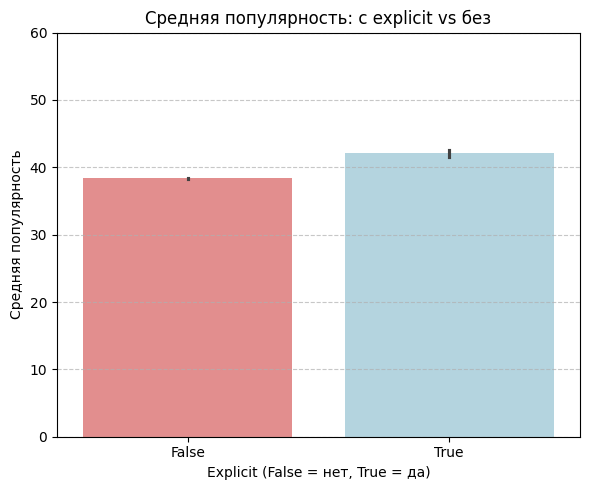

In [16]:

plt.figure(figsize=(6, 5))
sns.barplot(data=df_clean, x='explicit', y='popularity', palette=['lightcoral', 'lightblue'])
plt.title('Средняя популярность: с explicit vs без')
plt.xlabel('Explicit (False = нет, True = да)')
plt.ylabel('Средняя популярность')
plt.ylim(0, 60)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Вывод: гипотеза не подтвердилась, средняя популярность треков с отметкой выше.

# Гипотеза 5

Насышенность текстом влияет на танцевальность, чем больше текста - тем меньше танцевальность

/tmp/ipykernel_55/532665874.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_dance = df_clean.groupby('speech_bin')['danceability'].mean()


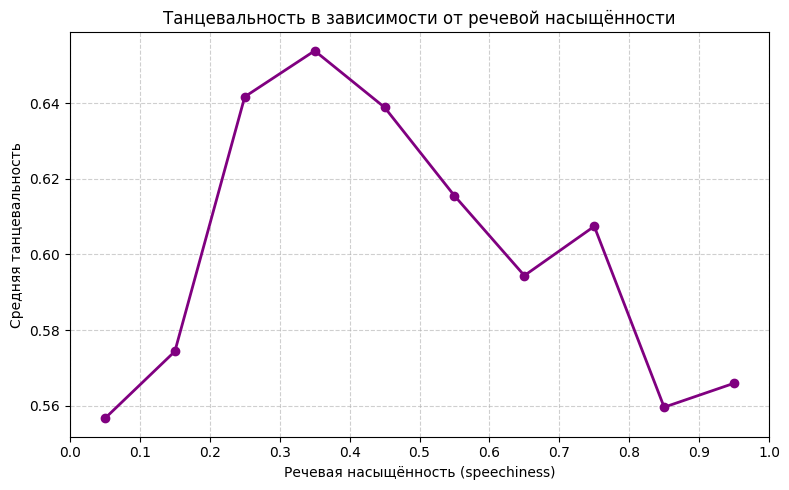

In [17]:
# Делим speechiness на 10 частей
bins = np.linspace(0, 1,11) 
df_clean['speech_bin'] = pd.cut(df_clean['speechiness'], bins=bins, include_lowest=True)

# Считаем среднюю танцевальность в каждом интервале
avg_dance = df_clean.groupby('speech_bin')['danceability'].mean()
centers = (bins[:-1] + bins[1:]) / 2

# Строим простой линейный график
plt.figure(figsize=(8, 5))
plt.plot(centers, avg_dance.values, marker='o', color='purple', linewidth=2, markersize=6)
plt.title('Танцевальность в зависимости от речевой насыщённости')
plt.xlabel('Речевая насыщённость (speechiness)')
plt.ylabel('Средняя танцевальность')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.tight_layout()
plt.show()

Вывод: гипотеза подтвердилась. Треки с небольшой речевой насыщенностью самые танцевальные.

# Корреляция


In [18]:
numeric_df = df_clean.select_dtypes(include=['number'])
# Считаем корреляцию с popularity и сортируем по абсолютному значению
corr_with_pop = numeric_df.corr()['popularity'].drop('popularity')
corr_with_pop = corr_with_pop.sort_values(key=abs, ascending=False)

print("Корреляции с popularity (от самых сильных по модулю):")
print(corr_with_pop.round(4))

Корреляции с popularity (от самых сильных по модулю):
instrumentalness   -0.1816
speechiness        -0.0903
loudness            0.0715
danceability        0.0613
duration_ms        -0.0523
liveness           -0.0520
energy             -0.0334
time_signature      0.0324
tempo              -0.0181
valence            -0.0132
acousticness       -0.0091
mode               -0.0061
key                -0.0031
Name: popularity, dtype: float64


Можем заметить, что линейная корреляция очень низкая, Я считаю что это следствие "золотой середины", то есть треки у которых среднее значение танцевальности, энергичности и наполненостью словами - популярнее, чем треки с максимальными значениями.

#  Feature Engineering



In [19]:
# Признаки "золотой середины"
df_clean['dance_centered'] = - (df_clean['danceability'] - 0.5) ** 2
df_clean['energy_centered'] = - (df_clean['energy'] - 0.5) ** 2


new_features = ['dance_centered', 'energy_centered',]
corr_check = df_clean[new_features + ['popularity']].corr()['popularity']

print("Корреляция признаков с popularity:")
print(corr_check[new_features].round(4))

Корреляция признаков с popularity:
dance_centered     0.0667
energy_centered    0.1224
Name: popularity, dtype: float64


Простая линейная модель

In [20]:
target = "popularity"

X = df_clean.drop(columns=[target])
X = X.select_dtypes(include="number")

y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"R2:   {r2:.3f}")
print(f"MAE:  {mae:.3f}")
print(f"MSE:  {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape:.2f}%")


R2:   0.064
MAE:  15.244
MSE:  349.387
RMSE: 18.692
MAPE: 167.75%


In [21]:
df_clean

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,time_signature,track_genre,danceability_bin,energy_bin,speech_bin,dance_centered,energy_centered
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,...,0.3580,0.7150,87.917,4,acoustic,"(0.6, 0.7]","(0.45, 0.5]","(0.1, 0.2]",-0.030976,-0.001521
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,...,0.1010,0.2670,77.489,4,acoustic,"(0.4, 0.5]","(0.15, 0.2]","(-0.001, 0.1]",-0.006400,-0.111556
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,...,0.1170,0.1200,76.332,4,acoustic,"(0.4, 0.5]","(0.35, 0.4]","(-0.001, 0.1]",-0.003844,-0.019881
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,...,0.1320,0.1430,181.740,3,acoustic,"(0.2, 0.3]","(0.05, 0.1]","(-0.001, 0.1]",-0.054756,-0.193952
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,...,0.0829,0.1670,119.949,4,acoustic,"(0.6, 0.7]","(0.4, 0.45]","(-0.001, 0.1]",-0.013924,-0.003249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,...,0.0863,0.0339,125.995,5,world-music,"(0.1, 0.2]","(0.2, 0.25]","(-0.001, 0.1]",-0.107584,-0.070225
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,...,0.1050,0.0350,85.239,4,world-music,"(0.1, 0.2]","(0.1, 0.15]","(-0.001, 0.1]",-0.106276,-0.146689
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,...,0.0839,0.7430,132.378,4,world-music,"(0.6, 0.7]","(0.3, 0.35]","(-0.001, 0.1]",-0.016641,-0.029241
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,...,0.2700,0.4130,135.960,4,world-music,"(0.5, 0.6]","(0.5, 0.55]","(-0.001, 0.1]",-0.007569,-0.000036


# Эксперименты с моделями машинного обучения/глубокого обучения.

Метрики

R² - доля дисперсии

MAE - Mean Squared Error Средняя абсолютная ошибка

RMSE - Root Mean Squared Error возвращает ошибку в оригинальных единицах

MAPE - Mean Absolute Percentage Error Средняя абсолютная ошибка в процентах


Нашел информацию про линейную модель которую используют при избыточности данных, решил протестировать.

In [22]:
X = df_clean.select_dtypes(include='number').drop(columns=['popularity'])
y = df_clean['popularity']

# Разделение
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение 
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

# Предсказание
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Метрики
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ridge)
mape = mean_absolute_percentage_error(y_test, y_pred_ridge) * 100

# Вывод
print("Метрики Ridge-регрессии:")
print(f"R²   : {r2:.4f}")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")

Метрики Ridge-регрессии:
R²   : 0.0638
MAE  : 15.24
MSE  : 349.39
RMSE : 18.69
MAPE : 167.75%


как можем заметить почти нет различий между Ridge и LinearRegression. Дело не в избыточности данных, а в отсутствии линейных зависимостей.

Деревья RandomForest

In [23]:
features = [
    'danceability', 'energy', 'valence', 'acousticness',
    'instrumentalness', 'liveness', 'speechiness', 'tempo',
    'loudness', 'dance_centered', 'energy_centered'
]

X = df_clean[features].fillna(df_clean[features].mean())
y = df_clean['popularity']

# Разделение
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Метрики
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"R2:   {r2:.3f}")
print(f"MAE:  {mae:.3f}")
print(f"MSE:  {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape:.2f}%")


# Feature Importances
importances = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nВажность признаков:")
print(importances)

R2:   0.442
MAE:  10.747
MSE:  208.187
RMSE: 14.429
MAPE: 89.43%

Важность признаков:
             feature  importance
3       acousticness    0.116041
8           loudness    0.109014
2            valence    0.107132
6        speechiness    0.106881
7              tempo    0.106824
4   instrumentalness    0.105693
5           liveness    0.092629
0       danceability    0.070650
10   energy_centered    0.064751
9     dance_centered    0.063058
1             energy    0.057326


показывает значительно лучшие результаты, чем линейные модели => нелинейная зависимость действительно существует. Древовидные модели способны их улавливать гораздо лучше
Анализ важности признаков подтверждает данные полученные при корреляции

Градиентный бустинг XGBoost

In [24]:
features = [
    'danceability', 'energy', 'valence', 'acousticness',
    'instrumentalness', 'liveness', 'speechiness', 'tempo',
    'loudness', 'dance_centered', 'energy_centered'
]

X = df_clean[features].fillna(df_clean[features].mean())
y = df_clean['popularity']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель  
model = xgb.XGBRegressor(
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

# Обучение
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Метрики
metrics = {
    'R²'   : r2_score(y_test, y_pred),
    'MAE'  : mean_absolute_error(y_test, y_pred),
    'MSE'  : mean_squared_error(y_test, y_pred),
    'RMSE' : np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAPE' : mean_absolute_percentage_error(y_test, y_pred) * 100
}

print("Метрики XGBoost")
print(f"R²   : {metrics['R²']:.3f}")
print(f"MAE  : {metrics['MAE']:.2f}")
print(f"MSE  : {metrics['MSE']:.2f}")
print(f"RMSE : {metrics['RMSE']:.2f}")
print(f"MAPE : {metrics['MAPE']:.2f}%")


# Важность признаков
importance_df = pd.DataFrame({
    'Признак': features,
    'Важность': model.feature_importances_
}).sort_values('Важность', ascending=False)

print("Важность признаков в XGBoost:")
print(importance_df.round(6).to_string(index=False))

Метрики XGBoost
R²   : 0.314
MAE  : 12.61
MSE  : 255.96
RMSE : 16.00
MAPE : 118.47%
Важность признаков в XGBoost:
         Признак  Важность
instrumentalness  0.140042
    acousticness  0.100048
        loudness  0.095204
 energy_centered  0.093636
         valence  0.091559
     speechiness  0.091461
  dance_centered  0.082592
           tempo  0.082135
        liveness  0.078044
    danceability  0.075390
          energy  0.069890


XGBoost лучше улавливает нелинейные зависимости, чем линейные модели, но всё равно ограничен, и показывает себя хуже чем дерево. Возможно дело в неправильных параметрах(ручной подбор).

Нейронная сеть MLPRegressor

In [25]:
features = [
    'danceability', 'energy', 'valence', 'acousticness',
    'instrumentalness', 'liveness', 'speechiness', 'tempo',
    'loudness', 'dance_centered', 'energy_centered'
]

X = df_clean[features].fillna(df_clean[features].mean())
y = df_clean['popularity']

# Разделение
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Модель 
mlp_model = MLPRegressor(
    hidden_layer_sizes=(100, 50, 20),   
    activation='relu',
    solver='adam',
    alpha=0.001,                       
    learning_rate='adaptive',
    max_iter=150,                     
    random_state=42,
    early_stopping=True,               
    n_iter_no_change=30,                
    verbose=False 
)

# Обучение
mlp_model.fit(X_train_scaled, y_train)

# Предсказания
y_pred = mlp_model.predict(X_test_scaled)

# Метрики
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print("Метрики нейронной сети")
print(f"R²   : {r2:.3f}")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")



Метрики нейронной сети
R²   : 0.139
MAE  : 14.30
MSE  : 321.44
RMSE : 17.93
MAPE : 156.85%


Показывает крайне слабые значения метрик, сложно предположить в чем причина, либо нехватает признаков, либо проблема в настройке.


**LinearRegression**

R2:   0.064

MAE:  15.244

MSE:  349.387

RMSE: 18.692

MAPE: 167.75%


**Ridge** 

R²   : 0.0638

MAE  : 15.24

MSE  : 349.39

RMSE : 18.69

MAPE : 167.75%

**Random Forest**

R2:   0.442

MAE:  10.747

MSE:  208.187

RMSE: 14.429

MAPE: 89.43%

**XGBoost**

R²   : 0.314

MAE  : 12.61

MSE  : 255.96

RMSE : 16.00

MAPE : 118.47%

**MLPRegressor**

R²   : 0.139

MAE  : 14.30

MSE  : 321.44

RMSE : 17.93

MAPE : 156.85%


# Кросс-валидация для RandomForest 

In [26]:
features = [
    'danceability', 'energy', 'valence', 'acousticness',
    'instrumentalness', 'liveness', 'speechiness', 'tempo',
    'loudness', 'dance_centered', 'energy_centered'
]

X = df_clean[features].fillna(df_clean[features].mean())
y = df_clean['popularity']

rf_cv = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Кросс-валидация по 5 фолдам
r2_scores = cross_val_score(rf_cv, X, y, cv=5, scoring='r2')
mae_scores = -cross_val_score(rf_cv, X, y, cv=5, scoring='neg_mean_absolute_error')
mape_scores = -cross_val_score(rf_cv, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')

print("Кросс-валидация (5 фолдов) для Random Forest:")
print(f"R²   : {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")
print(f"MAE  : {mae_scores.mean():.2f} ± {mae_scores.std():.2f}")
print(f"MAPE : {mape_scores.mean()*100:.2f}% ± {mape_scores.std()*100:.2f}%")

KeyboardInterrupt: 

# Вывод

В рамках работы я решал задачу регрессии: предсказывал популярность треков Spotify по их аудио-признакам. Я выдвинул гипотезы, оценил корреляции и испытал разные модели.

Лучше всего себя показали RandomForest и XGBoost. Думаю, это связано с нелинейной связью признаков и тем, что сами признаки ограничены — сложно предсказать популярность, не зная, насколько известен автор.